In [13]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../..'))
from g4l.estimators import BIC
from g4l.estimators import Prune
import g4l.display
from g4l.models import ContextTree
from g4l.data import Sample

#results_folder = os.path.abspath('../simulation_study/results')
max_depth = 4

In [14]:
samples_folder = "../../examples/linguistic_case_study"
X_bp = Sample('%s/folha.txt' % samples_folder, [0, 1, 2, 3, 4])
X_ep = Sample('%s/publico.txt' % samples_folder, [0, 1, 2, 3, 4])

### Estimating models for Brazilian Portuguese (BP) 

In [15]:
cache_folder = "../../examples/linguistic_case_study/cache/prune"
prune_bp = Prune(max_depth)
prune_bp.fit(X_bp)
champion_trees_bp = prune_bp.context_trees
df = pd.DataFrame(columns=['idx', 'num_contexts', 'log_likelihood', 'tree'])
for i, tree in enumerate(prune_bp.context_trees):
    df.loc[len(df)] = [i, tree.num_contexts(), tree.log_likelihood(), tree.to_str()]
print("Champion trees for BP:")
df

Champion trees for BP:


,idx,num_contexts,log_likelihood,tree
0,0,150,-205257.375482,0000 0001 0010 0012 0013 0014 0020 0021 0030 ...
1,1,149,-205257.377404,0000 0001 0010 0012 0013 0014 0020 0021 0030 ...
2,2,148,-205257.415825,0000 0001 0010 0012 0013 0020 0021 0030 0032 ...
3,3,146,-205257.470623,0000 0001 0010 0012 0013 0020 0021 0030 0032 ...
4,4,144,-205257.529468,0000 0001 0010 0012 0013 0020 0021 0030 0032 ...
...,...,...,...,...
70,70,13,-77355.639636,000 001 10 100 2 20 200 201 21 3 30 300 4
71,71,12,-77433.938184,000 01 10 100 2 20 200 21 3 30 300 4
72,72,11,-77496.690829,000 1 10 100 2 20 200 3 30 300 4
73,73,8,-81640.985369,00 1 10 2 20 3 30 4


### Estimating models for European Portuguese (BP) 

In [16]:
cache_folder = "../../examples/linguistic_case_study/cache/prune"
prune_ep = Prune(max_depth)
prune_ep.fit(X_ep)
champion_trees_ep = prune_ep.context_trees
df = pd.DataFrame(columns=['idx', 'num_contexts', 'log_likelihood', 'tree'])
for i, tree in enumerate(prune_ep.context_trees):
    df.loc[len(df)] = [i, tree.num_contexts(), tree.log_likelihood(), tree.to_str()]
print("Champion trees for EP")
df

Champion trees for EP


,idx,num_contexts,log_likelihood,tree
0,0,150,-222107.406932,0000 0001 0010 0012 0013 0014 0020 0021 0030 ...
1,1,149,-222107.454278,0000 0001 0010 0012 0013 0014 0020 0021 0030 ...
2,2,148,-222107.510292,0000 0001 0010 0012 0013 0014 002 0020 0021 0...
3,3,147,-222107.661733,0000 0001 0010 0012 0013 0014 002 0020 0021 0...
4,4,144,-222108.014276,0000 0001 0010 0012 0013 0014 002 0020 0021 0...
...,...,...,...,...
70,70,13,-83316.343784,000 001 10 100 2 20 200 201 21 3 30 300 4
71,71,12,-83414.211741,000 01 10 100 2 20 200 21 3 30 300 4
72,72,11,-83473.606457,000 1 10 100 2 20 200 3 30 300 4
73,73,8,-87559.415391,00 1 10 2 20 3 30 4


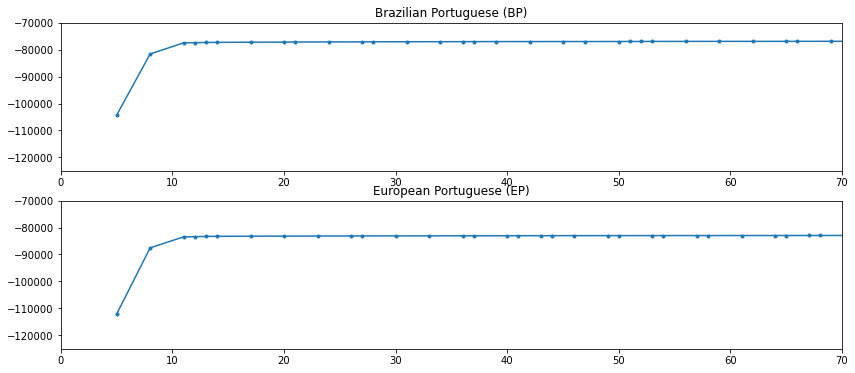

In [17]:
plt.figure(figsize=(14, 6))
txt = ['Brazilian Portuguese (BP)', 'European Portuguese (EP)']
for i, el in enumerate([prune_bp, prune_ep]):
    plt.subplot(2, 1, i+1)
    num_contexts = [t.num_contexts() for t in el.context_trees]
    likelihoods = [t.log_likelihood() for t in el.context_trees]
    plt.plot(num_contexts, likelihoods, marker='.')
    plt.title(txt[i])
    plt.xlim(0, 70)
    plt.ylim(-125000, -70000)
plt.show()

In [8]:
len(prune_bp.context_trees)

75

000 001 010 0210 100 1210 2 20 200 201 21 3 30 300 3210 4 4210


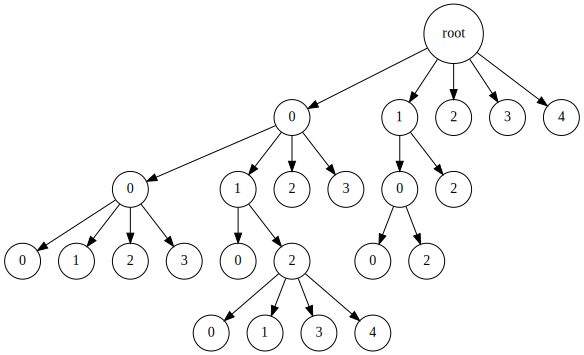

In [21]:
identified_tree_idx = 68
identified_tree = prune_bp.context_trees[identified_tree_idx]
print(identified_tree.to_str())
# A visual representation of the selected tree:
import g4l.display
g4l.display.draw_tree(identified_tree, size='200,400')